In [ ]:
# We are given with the glass dataset.
# We need to perform KNN algorithm .

**Glass Dataset**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass (1).csv


In [ ]:
# Reading the Dataset

In [ ]:
glass = pd.read_csv('glass.csv')

In [ ]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
# Basic information of the dataset

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# Shape of the dataset

In [ ]:
glass.shape

(214, 10)

In [ ]:
# Checking for null values

In [ ]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
# Dropping Ba,Fe column

In [ ]:
Glass = glass.drop(['Ba','Fe'],axis=1)

In [ ]:
Glass

,RI,Na,Mg,Al,Si,K,Ca,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [ ]:
# Description of the dataset

In [ ]:
Glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,7.000000


In [ ]:
# Dropping duplicates from the dataset

In [ ]:
glass = Glass.drop_duplicates()

In [ ]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [ ]:
# Correlation of the dataset with other variables

In [ ]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,0.002677
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,1.000000


In [ ]:
# Visualization of the dataset

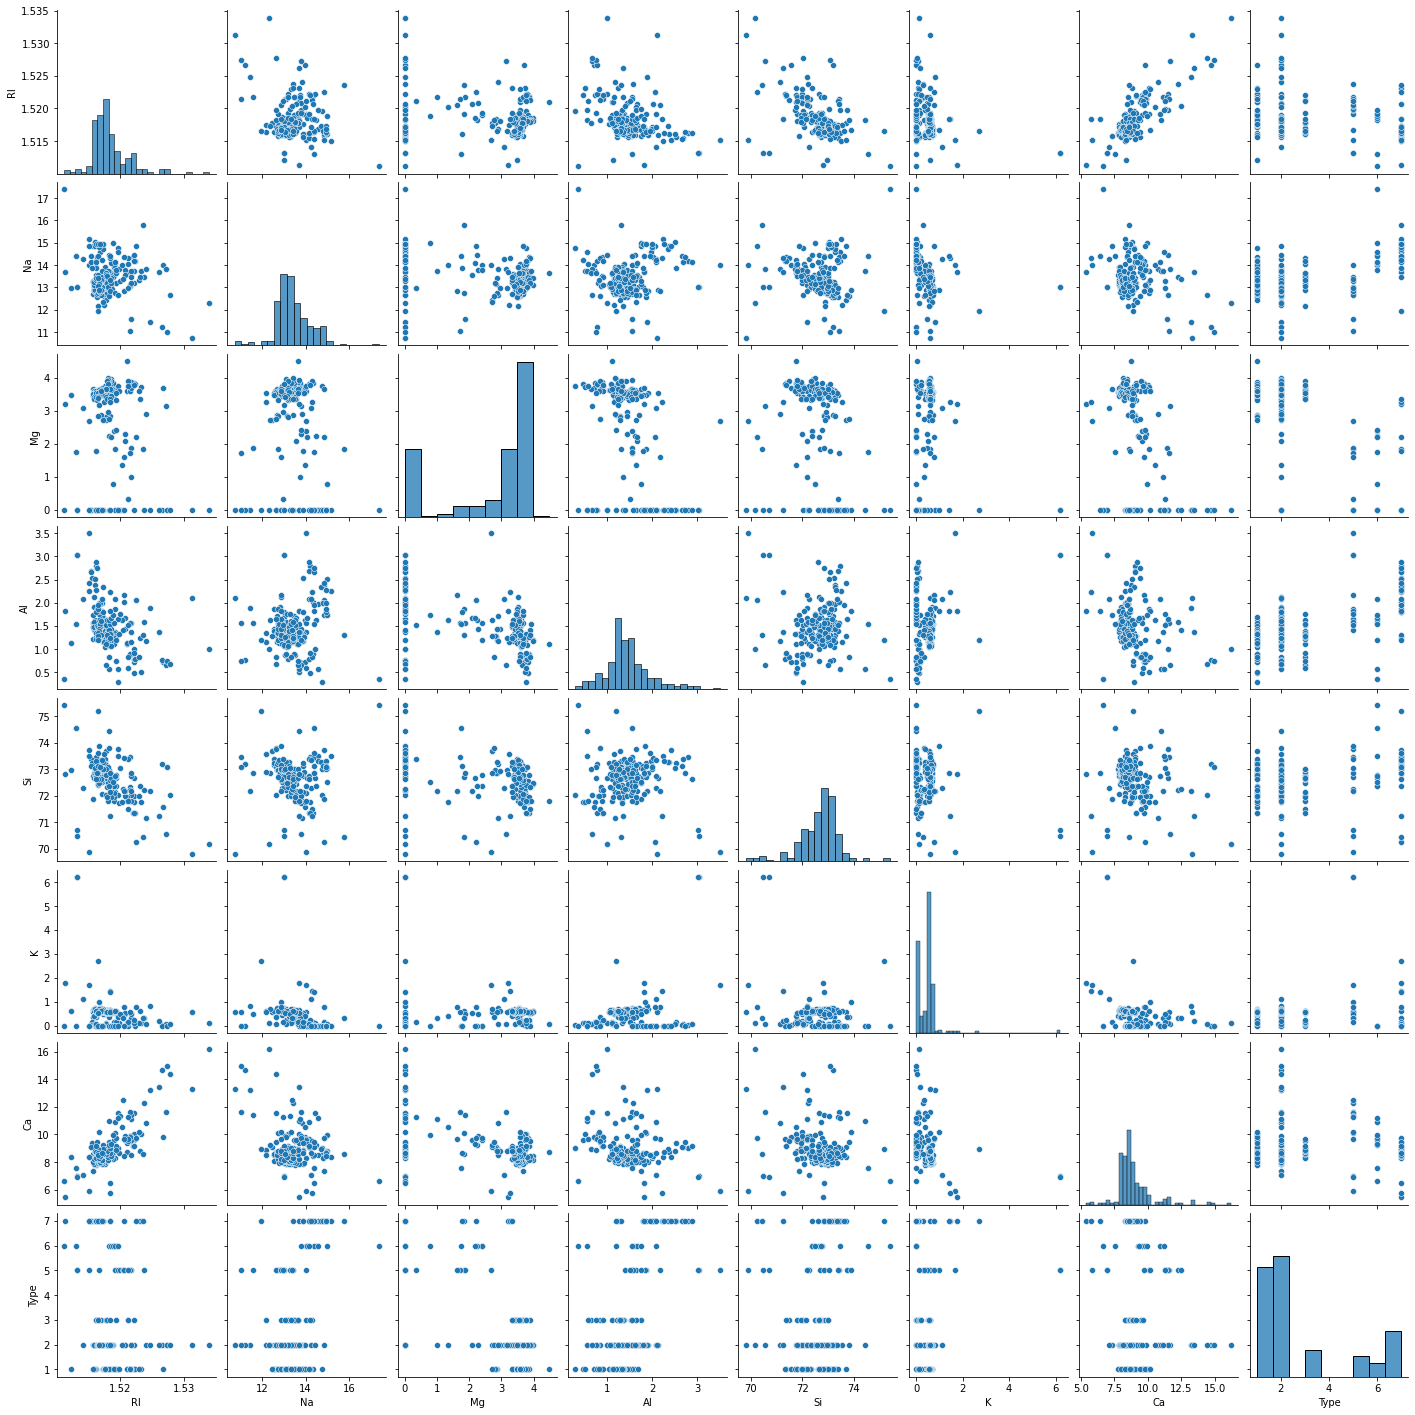

In [ ]:
import seaborn as sns
sns.pairplot(glass)

In [ ]:
# Storing the data values in a variable

In [ ]:
array = glass.values


In [ ]:
X = array[:,0:7]
Y = array[:,7]

In [ ]:
# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(X)

In [ ]:
scaled_data

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -1.13324789,
        -0.67348013, -0.14346582],
       [-0.24381562,  0.59640332,  0.63931074, ...,  0.09703652,
        -0.02896224, -0.79020061],
       [-0.71641202,  0.15454625,  0.6045957 , ...,  0.43374593,
        -0.16707322, -0.82534924],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ...,  0.99061151,
        -0.76555411, -0.36138732],
       [-0.60735132,  1.19781989, -1.86017161, ...,  1.23666839,
        -0.76555411, -0.33326842],
       [-0.40905912,  1.01371278, -1.86017161, ...,  0.91290934,
        -0.76555411, -0.23485225]])

In [ ]:
# Storing in a variale

X = scaled_data
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -1.13324789,
        -0.67348013, -0.14346582],
       [-0.24381562,  0.59640332,  0.63931074, ...,  0.09703652,
        -0.02896224, -0.79020061],
       [-0.71641202,  0.15454625,  0.6045957 , ...,  0.43374593,
        -0.16707322, -0.82534924],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ...,  0.99061151,
        -0.76555411, -0.36138732],
       [-0.60735132,  1.19781989, -1.86017161, ...,  1.23666839,
        -0.76555411, -0.33326842],
       [-0.40905912,  1.01371278, -1.86017161, ...,  0.91290934,
        -0.76555411, -0.23485225]])

In [ ]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [ ]:
kfold = KFold(n_splits = 20)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 40)
results = cross_val_score(model,X,Y,cv=kfold)
results

array([0.27272727, 0.81818182, 0.81818182, 0.90909091, 0.81818182,
       0.63636364, 1.        , 0.90909091, 0.09090909, 0.        ,
       1.        , 0.36363636, 0.45454545, 0.        , 0.        ,
       0.        , 0.        , 0.3       , 1.        , 0.9       ])

In [ ]:
print(results.mean())

0.5145454545454545


In [ ]:
# Grid Search CV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy
n_neighbors = numpy.array(range(1,81))
param_grid = dict(n_neighbors = n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [ ]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN,param_grid=param_grid)
grid.fit(X,Y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.667109634551495


In [ ]:
# Accuracy of the model

In [ ]:
array = glass.values

In [ ]:
X = array[:,0:7]
Y = array[:,7]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X,Y)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X)

In [ ]:
accuracy = accuracy_score(Y,y_pred)
accuracy

0.784037558685446

In [ ]:
# Visualization of the CV results

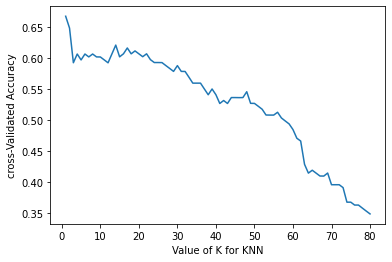

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(1,81)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,X,Y,cv=5)
  k_scores.append(scores.mean())
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('cross-Validated Accuracy')
plt.show()  

In [ ]:
# Printing all the scores 

In [ ]:
len(k_scores)

80

In [ ]:
glass_accuracy = pd.DataFrame({'Value of k' : range(1,81),
                            'Accuracy' : k_scores})
glass_accuracy

,Value of k,Accuracy
0,1,0.348394
1,2,0.353045
2,3,0.357807
3,4,0.362680
4,5,0.362680
...,...,...
75,76,0.611185
76,77,0.615947
77,78,0.620598
78,79,0.648062


In [ ]:
# In ascending order 

In [ ]:
glass_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
79,80,0.667110
78,79,0.648062
77,78,0.620598
76,77,0.615947
75,76,0.611185
...,...,...
4,5,0.362680
3,4,0.362680
2,3,0.357807
1,2,0.353045
